In [1]:
import math
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
from qiskit.tools.visualization import plot_histogram

In [7]:
def input_state(circ, q, n):
    """n-qubit input state for QFT that produces output 1."""
    for j in range(n):
        circ.h(q[j])
        circ.u1(math.pi/float(2**(j)), q[j]).inverse()

def qft(circ, q, n):
    """n-qubit QFT on q in circ."""
    for j in range(n):
        circ.h(q[j])
        for k in range(j+1,n):
            circ.cu1(math.pi/float(2**(k-j)), q[k], q[j])
        circ.barrier()

OPENQASM 2.0;
include "qelib1.inc";
qreg x[3];
creg c[3];
h x[0];
u1(3.14159265358979) x[0];
h x[1];
u1(1.57079632679490) x[1];
h x[2];
u1(0.785398163397448) x[2];



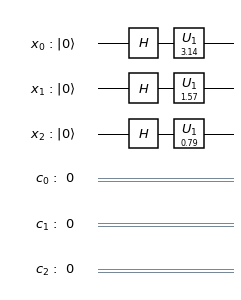

In [8]:
q = QuantumRegister(3, 'x')
c = ClassicalRegister(3, 'c')
qft3 = QuantumCircuit(q, c)

# first, prepare the state that should return 001 and draw that circuit:
input_state(qft3, q, 3)

print(qft3.qasm())
qft3.draw(output='mpl')

OPENQASM 2.0;
include "qelib1.inc";
qreg x[3];
creg c[3];
h x[0];
u1(3.14159265358979) x[0];
h x[1];
u1(1.57079632679490) x[1];
h x[2];
u1(0.785398163397448) x[2];
h x[0];
cu1(1.57079632679490) x[1],x[0];
cu1(0.785398163397448) x[2],x[0];
h x[1];
cu1(1.57079632679490) x[2],x[1];
h x[2];
measure x[0] -> c[0];
measure x[1] -> c[1];
measure x[2] -> c[2];



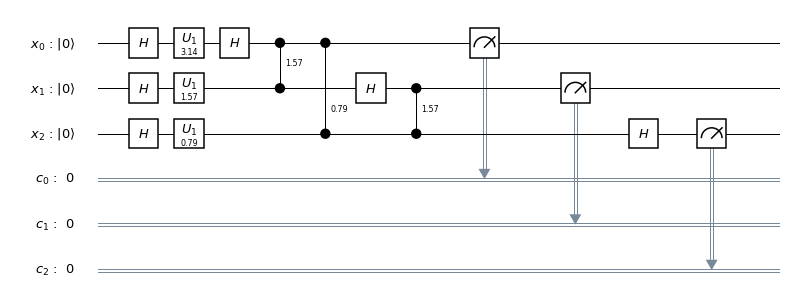

In [4]:
qft(qft3, q, 3)
for i in range(3):
    qft3.measure(q[i], c[i])

print(qft3.qasm())
qft3.draw(output='mpl')

In [5]:
IBMQ.load_accounts()
# Use the IBM Quantum Experience
backend = least_busy(IBMQ.backends(simulator=False))
shots = 2048
job_exp = execute(qft3, backend=backend, shots=shots)
job_monitor(job_exp)

Job Status: job has successfully run


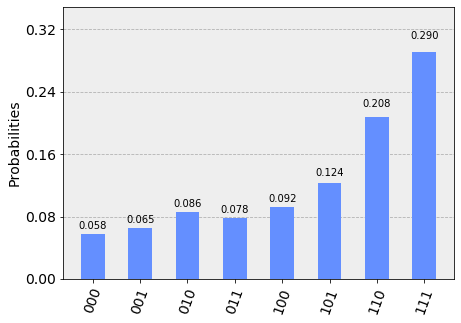

In [6]:
results = job_exp.result()
plot_histogram(results.get_counts())

We see that the highest probability outcome is still 001 when we execute the code on a real device.